<a href="https://colab.research.google.com/github/rafaelnogueira98/EDA---Vinhos/blob/main/EDA_Vinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Etapas**
- Entendimento do negócio
- Compreensão dos dados
- Tratamento e limpeza dos dados
- Análise (extrair informações relevantes para conseguir responder perguntas)


## **Compreensão dos dados**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/infoslack/ml-book-exemplos/refs/heads/main/data/winemag-data-130k-v2.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## **Sumário**

* **unnamed** - parece ser uma coluna de índice que podemos remover
* **country** - país onde o vinho foi feito (interessante)
* **description** - descrição do vinho
* **designation** - vinhedo dentro da adega de onde as uvas que fizeram o vinho foram coletadas.
* **points** - é o número de pontos que o vinho obteve em sua avaliação (precisamos entender a escala de pontos)
* **price** - preço da garrafa de vinho
* **province** - é a província (estado) onde o vinho foi feito
* **region_1** - é a região onde o vinho foi feito
* **region_2** - região mais específica dentro de uma vitícola (podemos remover isso)
* **taster_name** - nome do revisor
* **taster_twitter_handle** - perfil do Twitter do avaliador
* **title** - nome do vinho analisado (o ano de fabricação está no título)
* **variety** - tipo de uvas utilizadas na fabricação do vinho
* **winery** - adega onde o vinho foi feito.

1.**De qual país vem o melhor vinho?**

2.**Existe relação entre o preço do vinho com a qualidade?**

3.**Existem tipos de uva de maior qualidade?**

4.**Qual o melhor vinho em cada faixa de preço?**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [4]:
df.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


## Tabela de Classificação por pontos

* **98-100** - Clássico
* **94-97** - Soberbo
* **90-93** - Excelente
* **87-89** - Muito bom
* **83-86** - Bom
* **80-82** - Aceitável



In [ ]:
df["country"].value_counts()

,count
country,
US,54504
France,22093
Italy,19540
Spain,6645
Portugal,5691
Chile,4472
Argentina,3800
Austria,3345
Australia,2329


In [5]:
df["variety"].value_counts()

,count
variety,
Pinot Noir,13272
Chardonnay,11753
Cabernet Sauvignon,9472
Red Blend,8946
Bordeaux-style Red Blend,6915
...,...
Picapoll,1
Blauburger,1
Tinta Madeira,1


## **Limpeza dos dados**

In [11]:
df1 = df.copy()

In [12]:
df1 = df1.drop(["Unnamed: 0", "designation", "region_1", "region_2", "taster_name", "taster_twitter_handle"], axis=1)

In [13]:
df1.head()

,country,description,points,price,province,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  object 
 1   description  129971 non-null  object 
 2   points       129971 non-null  int64  
 3   price        120975 non-null  float64
 4   province     129908 non-null  object 
 5   title        129971 non-null  object 
 6   variety      129970 non-null  object 
 7   winery       129971 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 7.9+ MB


In [15]:
print("{:.0%}".format(df1["price"].count() / df1.shape[0]))

93%


In [16]:
df1 = df1.dropna(subset=["country", "price", "variety"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120915 entries, 1 to 129970
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      120915 non-null  object 
 1   description  120915 non-null  object 
 2   points       120915 non-null  int64  
 3   price        120915 non-null  float64
 4   province     120915 non-null  object 
 5   title        120915 non-null  object 
 6   variety      120915 non-null  object 
 7   winery       120915 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.3+ MB


# **Análise exploratória**

Text(0, 0.5, 'Frequência')

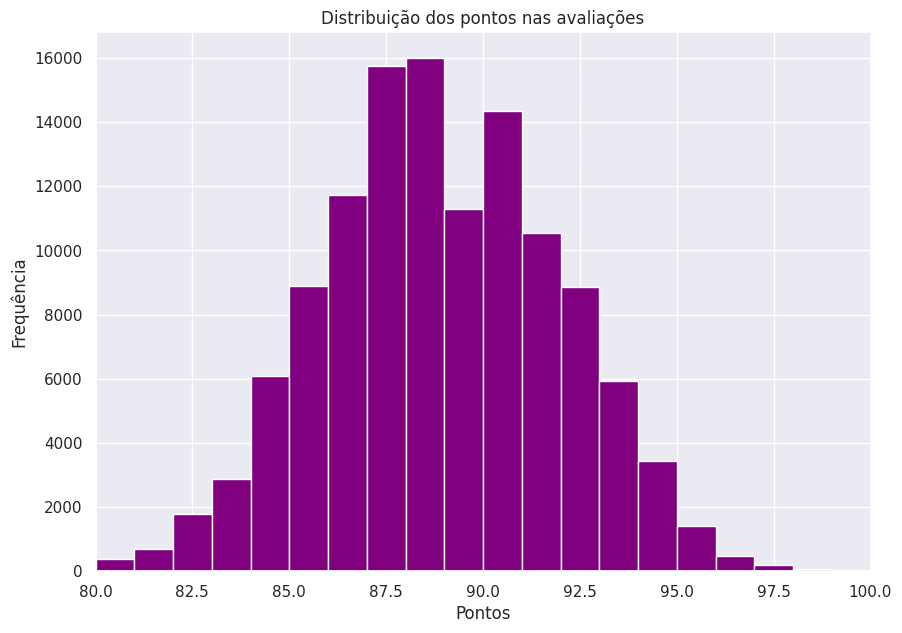

In [18]:
plt.figure(figsize=(10, 7))
plt.hist(data=df1, x="points",
         bins=20,
         color="purple")

plt.xlim(80, 100)
plt.title("Distribuição dos pontos nas avaliações")
plt.xlabel("Pontos")
plt.ylabel("Frequência")

In [20]:
vinhos_top_10 = df1["country"].value_counts()[:10]
vinhos_top_10

,count
country,
US,54265
France,17776
Italy,16914
Spain,6573
Portugal,4875
Chile,4415
Argentina,3756
Austria,2799
Australia,2294


Text(0, 0.5, 'Total de vinhos avaliados')

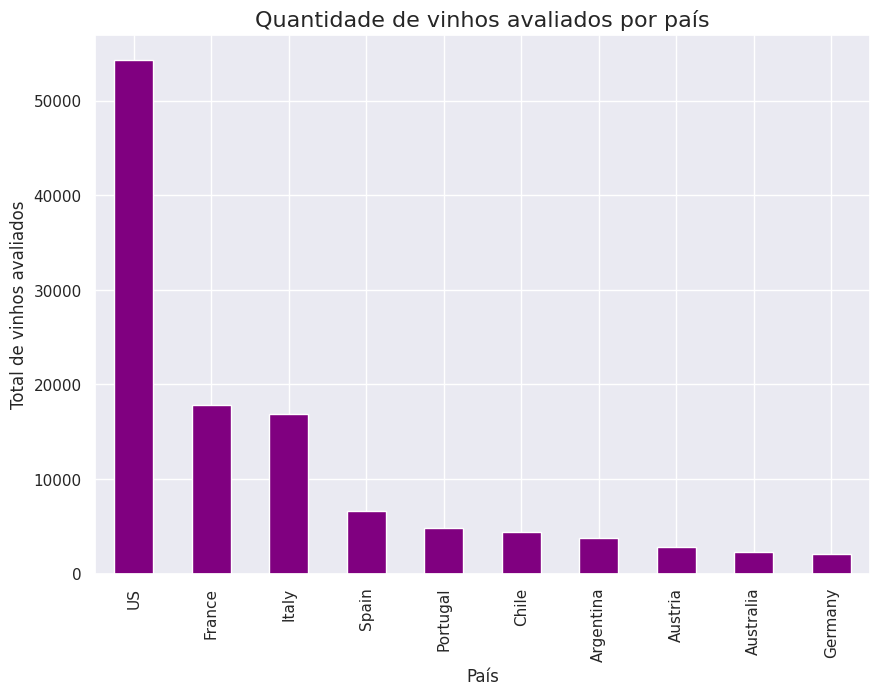

In [21]:
plt.figure(figsize=(10, 7))
vinhos_top_10.plot(kind="bar", color="purple")
plt.title("Quantidade de vinhos avaliados por país", fontsize=16)
plt.xlabel("País")
plt.ylabel("Total de vinhos avaliados")

In [28]:
melhor_qualidade = df1.groupby("country")["points"].mean().reset_index()
melhor_qualidade = melhor_qualidade.sort_values(by="points", ascending=False)[:10]
melhor_qualidade.style.background_gradient(cmap="Purples", high=0.5, subset=["points"])

,country,points
13,England,91.550725
19,India,90.222222
3,Austria,90.190782
16,Germany,89.836321
7,Canada,89.377953
18,Hungary,89.165517
9,China,89.000000
14,France,88.734867
23,Luxembourg,88.666667
21,Italy,88.618186


<ipython-input-34-5b1dca051343>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="Purples_r")


Text(0, 0.5, 'País')

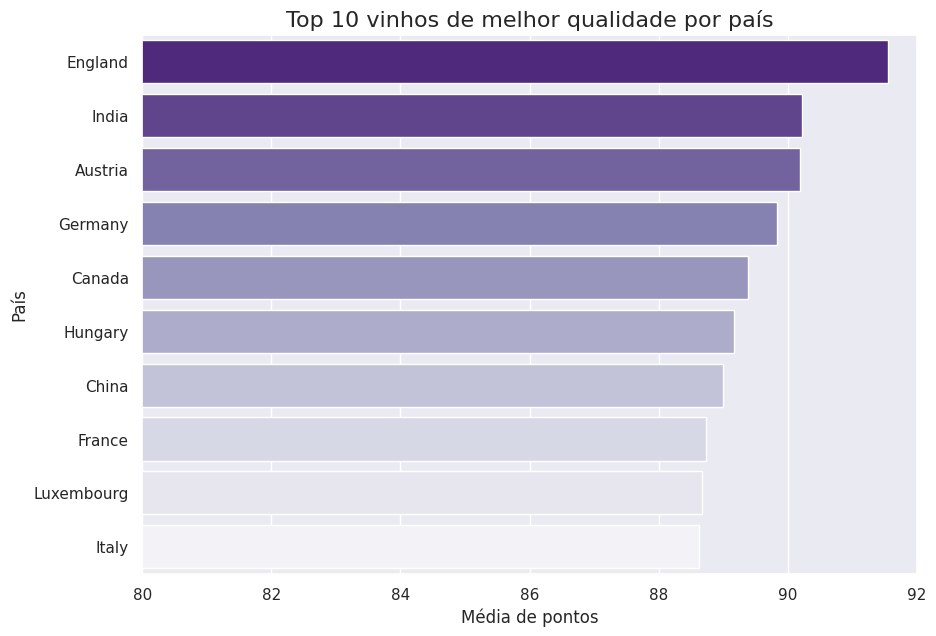

In [34]:
y = melhor_qualidade['country']
x = melhor_qualidade["points"]

plt.figure(figsize=(10, 7))
plt.xlim(80, 92)
sns.barplot(x=x, y=y, palette="Purples_r")
plt.title("Top 10 vinhos de melhor qualidade por país", fontsize=16)
plt.xlabel("Média de pontos")
plt.ylabel("País")


In [35]:
acima_95pontos = df1[df1["points"] >= 95]
acima_95pontos["country"].value_counts()

,count
country,
US,991
France,509
Italy,326
Austria,103
Portugal,96
Germany,62
Spain,51
Australia,47
Argentina,11


<ipython-input-37-7574c6f54907>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x="points", y="country", palette="Purples_r")


Text(0, 0.5, 'País')

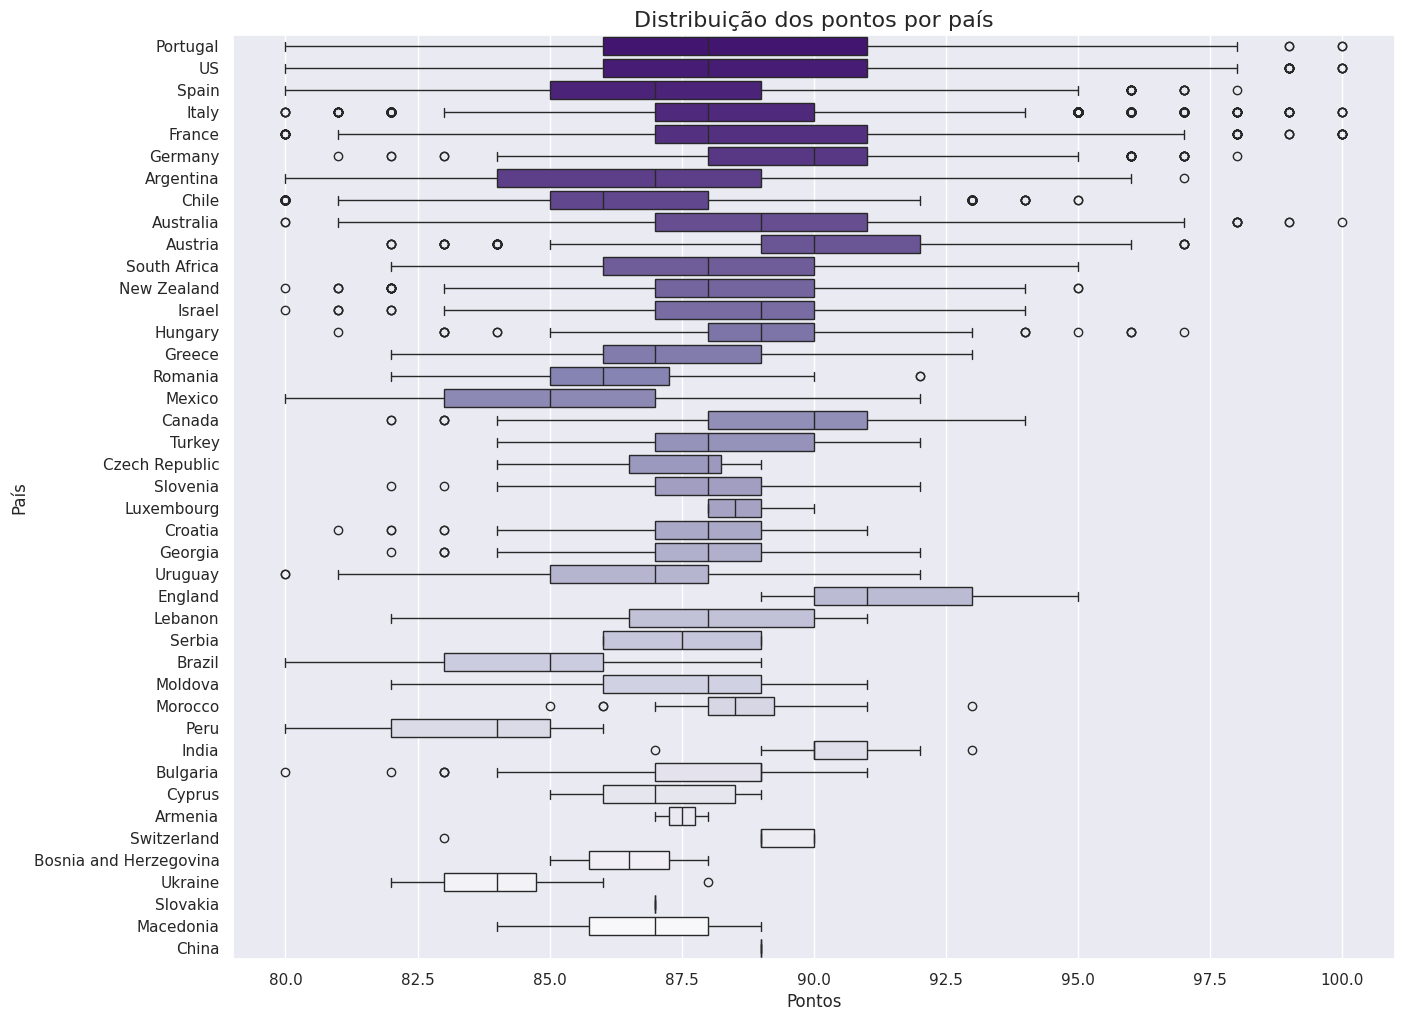

In [37]:
plt.figure(figsize=(15, 12))
sns.boxplot(data=df1, x="points", y="country", palette="Purples_r")
plt.title("Distribuição dos pontos por país", fontsize=16)
plt.xlabel("Pontos")
plt.ylabel("País")

<ipython-input-42-133be376a2cd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x, y=y, palette="Purples_r")


Text(0, 0.5, 'País')

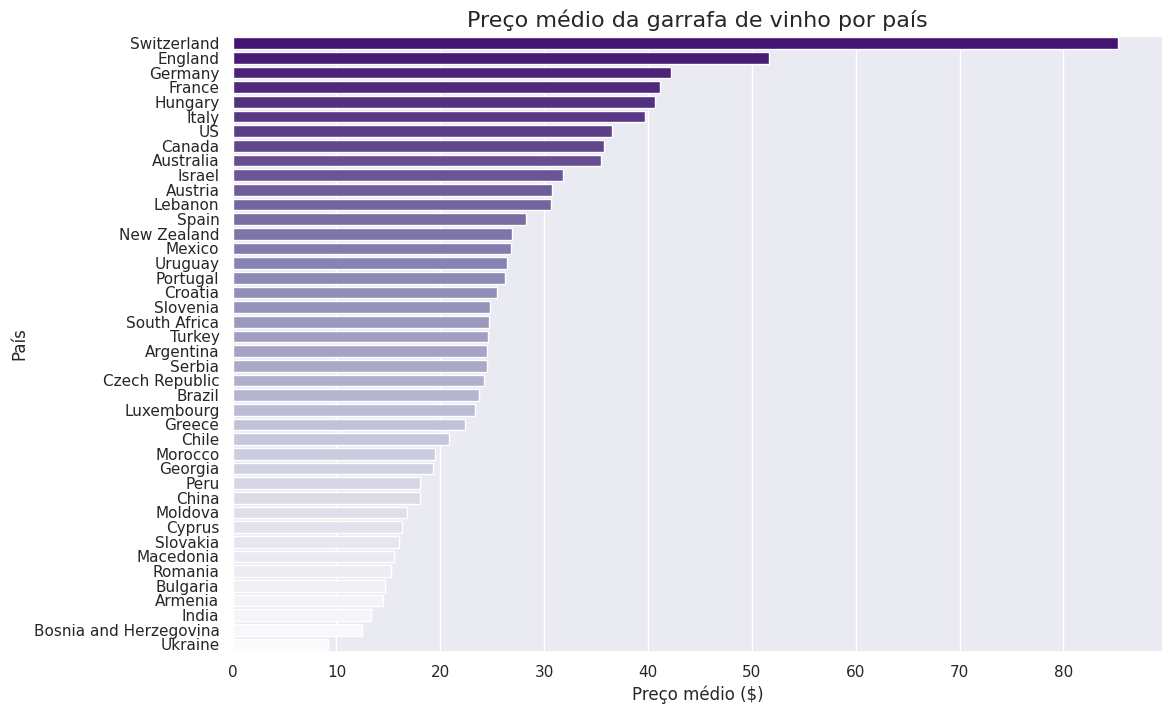

In [42]:
preco_medio = df1.groupby("country")["price"].mean().reset_index()
preco_medio = preco_medio.sort_values(by="price", ascending=False)

x = preco_medio["price"]
y = preco_medio["country"]

plt.figure(figsize=(12, 8))
sns.barplot(x=x, y=y, palette="Purples_r")
plt.title("Preço médio da garrafa de vinho por país", fontsize=16)
plt.xlabel("Preço médio ($)")
plt.ylabel("País")


Text(0, 0.5, 'Frequência')

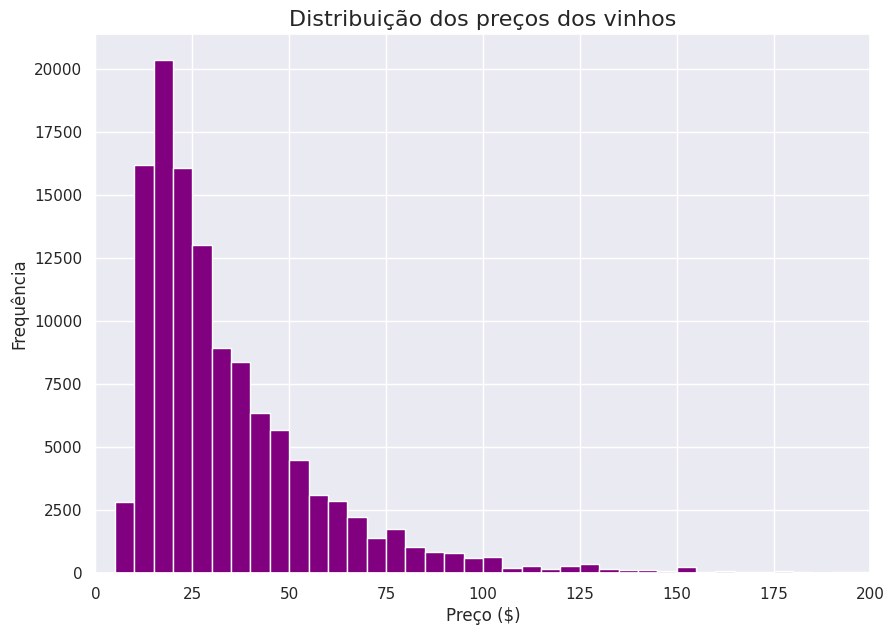

In [43]:
plt.figure(figsize=(10, 7))
bins = np.arange(0, df1["price"].max()+5, 5)
plt.hist(data=df1, x="price", bins=bins, color="purple")
plt.xlim(0, 200)
plt.title("Distribuição dos preços dos vinhos", fontsize=16)
plt.xlabel("Preço ($)")
plt.ylabel("Frequência")

In [44]:
df1["price"].describe()

,price
count,120915.000000
mean,35.368796
std,41.031188
min,4.000000
25%,17.000000
50%,25.000000
75%,42.000000
max,3300.000000


In [46]:
np.log10(df1["price"].describe())

,price
count,5.082480
mean,1.548620
std,1.613114
min,0.602060
25%,1.230449
50%,1.397940
75%,1.623249
max,3.518514


Text(0, 0.5, 'Frequência')

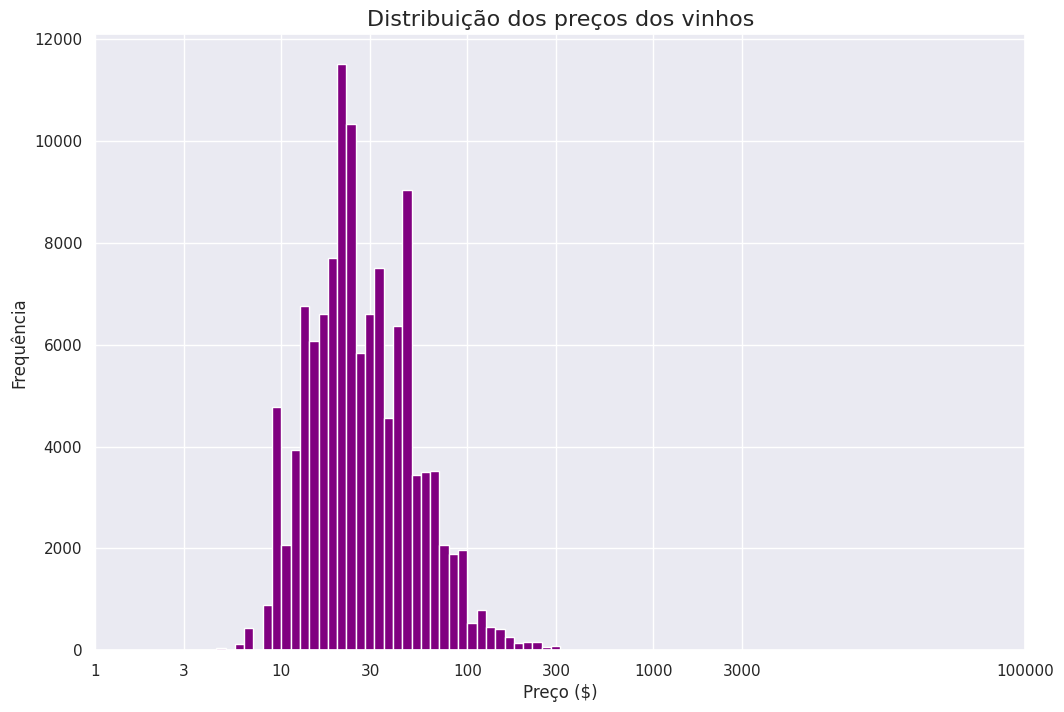

In [48]:
plt.figure(figsize=(12, 8))
bins = 10 ** np.arange(0.5, 2.5+0.05, 0.05)
valores = [1, 3, 10, 30, 100, 300, 1000, 3000, 100000]
plt.hist(data=df1, x="price", bins=bins, color="purple")
plt.title("Distribuição dos preços dos vinhos", fontsize=16)
plt.xscale("log")
plt.xticks(valores, valores)
plt.xlabel("Preço ($)")
plt.ylabel("Frequência")

Text(0, 0.5, 'Pontos')

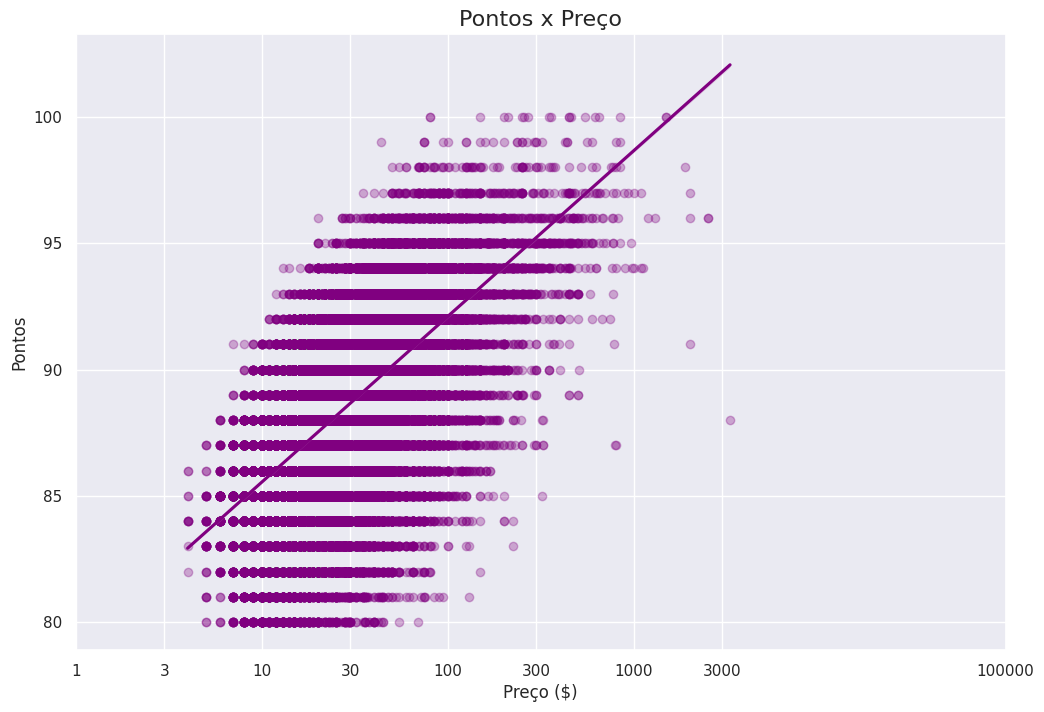

In [49]:
x = [1, 3, 10, 30, 100, 300, 1000, 3000, 100000]

plt.figure(figsize=(12, 8))
sns.regplot(x="price", y="points", data=df1, color="purple", logx = True, scatter_kws={"alpha":0.3})
plt.title("Pontos x Preço", fontsize=16)
plt.xscale("log"),
plt.xticks(x, x)
plt.xlabel("Preço ($)")
plt.ylabel("Pontos")